In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
rain=pd.read_csv('weatherAUS.csv')

In [4]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
rain['Date']= pd.to_datetime(rain['Date'])

rain['Year']=rain['Date'].dt.year
rain['Month']=rain['Date'].dt.month
rain['Day']=rain['Date'].dt.day
rain['Day of the week']=rain['Date'].dt.dayofweek

rain.drop('Date',axis=1,inplace=True)

rain.dropna(inplace=True, subset=['MinTemp', 'MaxTemp', 'Rainfall', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'])


#For the null values in  WindGustDir & WindDir9am, fill with value in WindDir3pm
rain['WindGustDir'].fillna(value=rain['WindDir3pm'],inplace=True)
rain['WindDir9am'].fillna(value=rain['WindDir3pm'],inplace=True)

dir= {"N": 0, "NNE": 22.5, "NE": 45, "ENE": 67.5, "E": 90, "ESE": 112.5, "SE": 135, "SSE": 157.5, "S": 180, "SSW": 202.5, "SW": 225, "WSW": 247.5, "W": 270, "WNW": 292.5, "NW": 315, "NNW": 337.5}
# create columns for directions in degrees-
def rep(val):
    return dir[val]

rain['WindDir3pm']=rain['WindDir3pm'].apply(rep)
rain['WindDir9am']=rain['WindDir9am'].apply(rep)
rain['WindGustDir']=rain['WindGustDir'].apply(rep)

bin_loc={}
for i in rain['Location'].unique():
    bin_loc[i]=rain['Rainfall'][rain['Location']==i].mean()
    
def rep_loc(loc):
    if bin_loc[loc]>=rain['Rainfall'].mean():
        return 1
    else:
        return 0
    
rain['bin_location']=rain['Location'].apply(rep_loc)
rain.drop('Location',axis=1,inplace=True)


In [6]:
#Obtain a relation between the wind speeds at 9am and 3pm, and the wind gust speed-
speed=rain[['WindGustSpeed','WindSpeed9am', 'WindSpeed3pm']].dropna()
X=speed.drop('WindGustSpeed',axis=1)
y=speed['WindGustSpeed']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(X_train,y_train)

preds=lm.predict(rain[['WindSpeed9am','WindSpeed3pm']])

rain['WindGustSpeed'].fillna(value=pd.Series(preds),inplace=True)

In [8]:
def bin_val(val):
    if val=='Yes':
        return 1
    else:
        return 0
rain['RainToday']=rain['RainToday'].apply(bin_val)
rain['RainTomorrow']=rain['RainTomorrow'].apply(bin_val)

rain['Pressure9am'].fillna(value=rain['Pressure9am'].mean(),inplace=True)
rain['Pressure3pm'].fillna(value=rain['Pressure3pm'].mean(),inplace=True)

rain['Evaporation'].fillna(value=rain['Evaporation'].mean(),inplace=True)
rain['Sunshine'].fillna(value=rain['Sunshine'].mean(),inplace=True)
rain['Cloud9am'].fillna(value=rain['Cloud9am'].mean(),inplace=True)
rain['Cloud3pm'].fillna(value=rain['Cloud3pm'].mean(),inplace=True)

In [9]:
rain.dropna(inplace=True)

<AxesSubplot:>

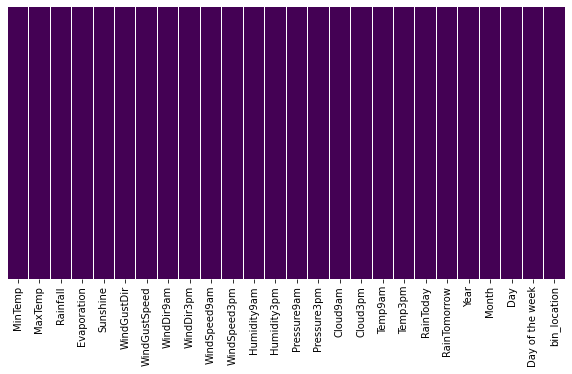

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(data=rain.isnull(),cbar=False,yticklabels=False, cmap='viridis')

In [13]:
rain

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Day of the week,bin_location
0,13.4,22.9,0.6,5.468291,7.657056,270.0,44.0,270.0,292.5,20.0,...,4.49369,16.9,21.8,0,0,2008,12,1,0,0
1,7.4,25.1,0.0,5.468291,7.657056,292.5,44.0,337.5,247.5,4.0,...,4.49369,17.2,24.3,0,0,2008,12,2,1,0
2,12.9,25.7,0.0,5.468291,7.657056,247.5,46.0,270.0,247.5,19.0,...,2.00000,21.0,23.2,0,0,2008,12,3,2,0
3,9.2,28.0,0.0,5.468291,7.657056,45.0,24.0,135.0,90.0,11.0,...,4.49369,18.1,26.5,0,0,2008,12,4,3,0
4,17.5,32.3,1.0,5.468291,7.657056,270.0,41.0,67.5,315.0,7.0,...,8.00000,17.8,29.7,0,0,2008,12,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,5.468291,7.657056,90.0,31.0,112.5,90.0,15.0,...,4.49369,9.4,20.9,0,0,2017,6,20,1,0
145455,2.8,23.4,0.0,5.468291,7.657056,90.0,31.0,135.0,67.5,13.0,...,4.49369,10.1,22.4,0,0,2017,6,21,2,0
145456,3.6,25.3,0.0,5.468291,7.657056,337.5,22.0,135.0,0.0,13.0,...,4.49369,10.9,24.5,0,0,2017,6,22,3,0
145457,5.4,26.9,0.0,5.468291,7.657056,0.0,37.0,135.0,292.5,9.0,...,4.49369,12.5,26.1,0,0,2017,6,23,4,0


In [14]:
rain.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day',
       'Day of the week', 'bin_location'],
      dtype='object')

In [22]:
X=rain.drop("RainTomorrow",axis=1)
y=rain['RainTomorrow']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
# 1000 trees

rfc=RandomForestClassifier(n_estimators=1000)

In [28]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [29]:
pred=rfc.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(confusion_matrix(y_test,pred))

[[30172  1258]
 [ 4358  4556]]


In [33]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     31430
           1       0.78      0.51      0.62      8914

    accuracy                           0.86     40344
   macro avg       0.83      0.74      0.77     40344
weighted avg       0.85      0.86      0.85     40344



In [34]:
# 2000 trees

rfc=RandomForestClassifier(n_estimators=2000)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=2000)

In [35]:
pred_2=rfc.predict(X_test)

In [36]:
print(confusion_matrix(y_test,pred_2))
print()
print(classification_report(y_test,pred_2))

[[30172  1258]
 [ 4330  4584]]

              precision    recall  f1-score   support

           0       0.87      0.96      0.92     31430
           1       0.78      0.51      0.62      8914

    accuracy                           0.86     40344
   macro avg       0.83      0.74      0.77     40344
weighted avg       0.85      0.86      0.85     40344

